

my data set: https://www.kaggle.com/datasets/deepu1109/star-dataset




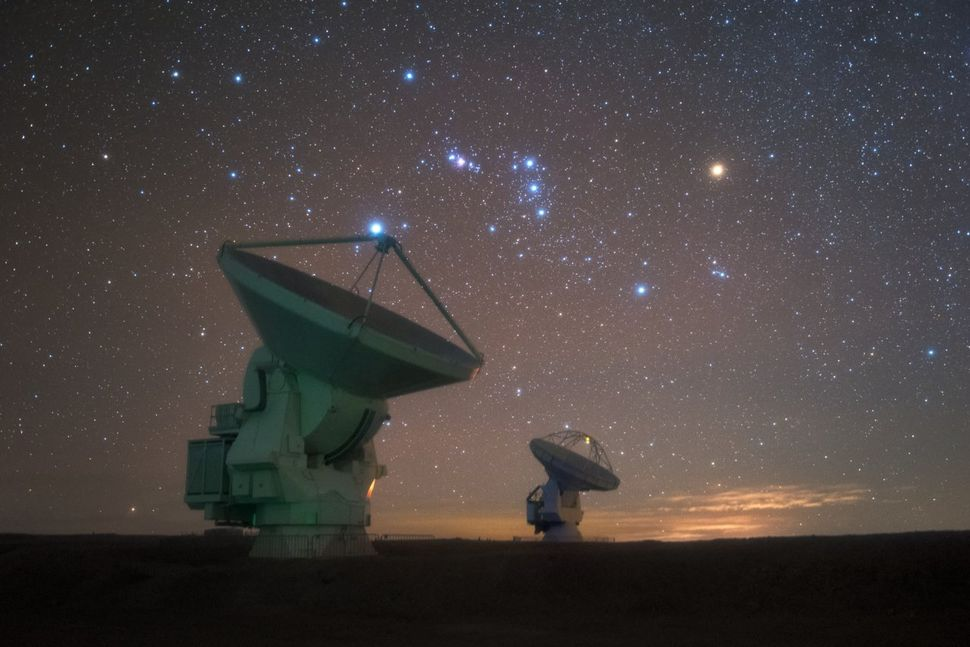

# Importing data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The data set has the following inputs:

Temperature - The temperature of the star.

Luminosity - The luminosity of the star.

Radius - The radius of the star.

Absolute magnitude - A measure of the luminosity of a celestial object, on an inverse logarithmic astronomical magnitude scale.

Star color - The color of the star.

Star type - The type of the star.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score ,ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import random

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/stars.csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
df.describe().transpose() # values range.

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.0,10497.462500,9552.425037,1939.00000,3344.250000,5776.0000,15055.5000,40000.00
Luminosity(L/Lo),240.0,107188.361635,179432.244940,0.00008,0.000865,0.0705,198050.0000,849420.00
Radius(R/Ro),240.0,237.157781,517.155763,0.00840,0.102750,0.7625,42.7500,1948.50
Absolute magnitude(Mv),240.0,4.382396,10.532512,-11.92000,-6.232500,8.3130,13.6975,20.06
Star type,240.0,2.500000,1.711394,0.00000,1.000000,2.5000,4.0000,5.00


In [ ]:
df.info() # checking if there are nulls/objects so I will know if I need to deal with them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


# Editing the data

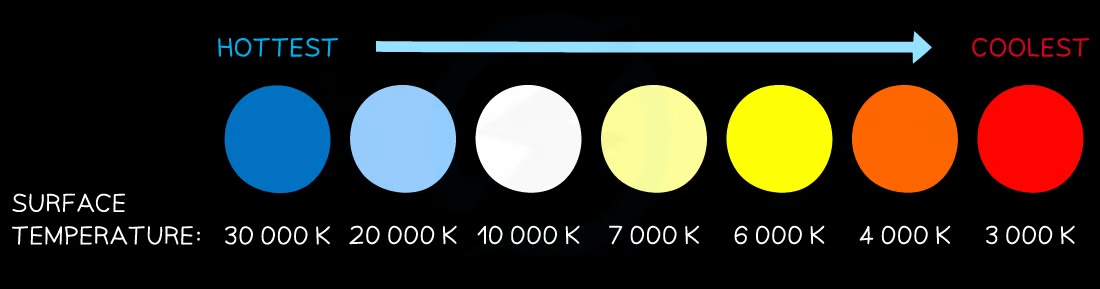

I organized all the objects based on two spectrums: the color spectrum and the spectral classification. I chose these spectrums because they follow a specific numerical sequence, which helped structure the data.

In [ ]:
df['Star color']=df['Star color'].replace(
    {'Blue':0,'Blue ':0,
     'Blue White': 1, 'Blue white ':1, 'Blue white':1, 'Blue-White':1, 'Blue-white': 1,
     'White':2, 'white': 2, 'Whitish':2,
     'White-Yellow':3, 'Yellowish': 3, 'Yellowish White':3,'yellow-white':3, 'yellowish': 3,
     'Orange':4, 'Orange-Red':4,
     'Pale yellow orange':5,
     'Red': 6})
df['Spectral Class']=df['Spectral Class'].replace({'O':0,'B':1, 'A':2, 'F':3, 'G':4, 'K':5, 'M': 6})


# Converting the data to numerical.

<ipython-input-29-e04f1f16d316>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Star color']=df['Star color'].replace(
<ipython-input-29-e04f1f16d316>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Spectral Class']=df['Spectral Class'].replace({'O':0,'B':1, 'A':2, 'F':3, 'G':4, 'K':5, 'M': 6})


In [ ]:
df.corr()[["Star type"]].transpose() # Checking the corrilation.

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
Star type,0.411129,0.676845,0.660975,-0.955276,1.0,-0.445471,-0.461116


# Graphs

In [ ]:
df['Star type']=df['Star type'].replace({0:'Brown Dwarf',1:'Red Dwarf',2:'White Dwarf',3:'Main Sequence',4:'Supergiant',5:'Hypergiant'})
# Converting data to names.

<Axes: title={'center': 'Luminosity'}, xlabel='Star type', ylabel='Luminosity(L/Lo)'>

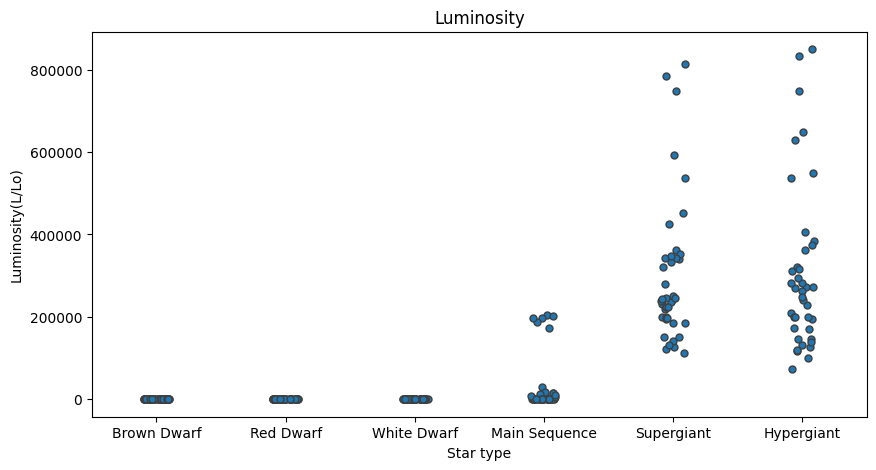

In [ ]:
plt.figure(figsize=(10,5)) # Spacing.
plt.title("Luminosity") # Title.
sns.stripplot(x=df["Star type"], y=df["Luminosity(L/Lo)"], linewidth=1)

From the graph, we can see that only stars with a luminosity greater than zero fall into these categories: Main Sequence, Supergiants, or Hypergiants.

<Axes: title={'center': 'Star color'}, xlabel='Star type', ylabel='Star color'>

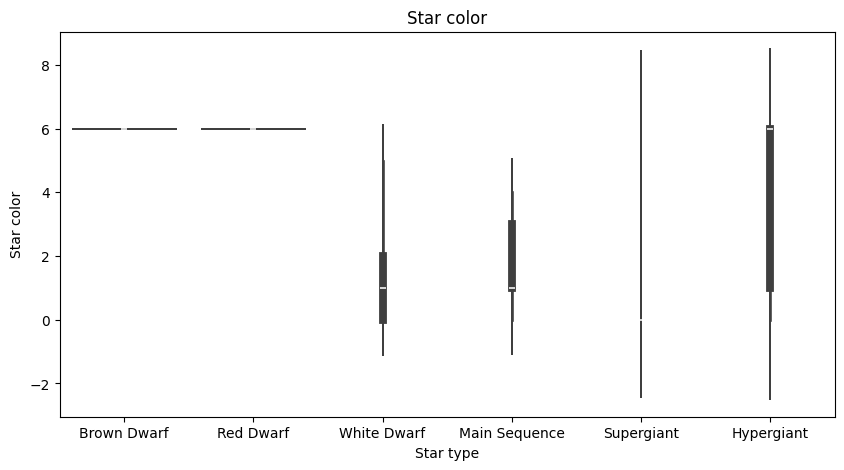

In [ ]:
plt.figure(figsize=(10,5)) # Spacing.
plt.title("Star color") # Title.
sns.violinplot(x=df["Star type"], y=df["Star color"])

This graph shows that the different colors help distinguish red dwarfs and brown dwarfs from other types of stars.

<Axes: title={'center': 'Absolute magnitude'}, xlabel='Star type', ylabel='Absolute magnitude(Mv)'>

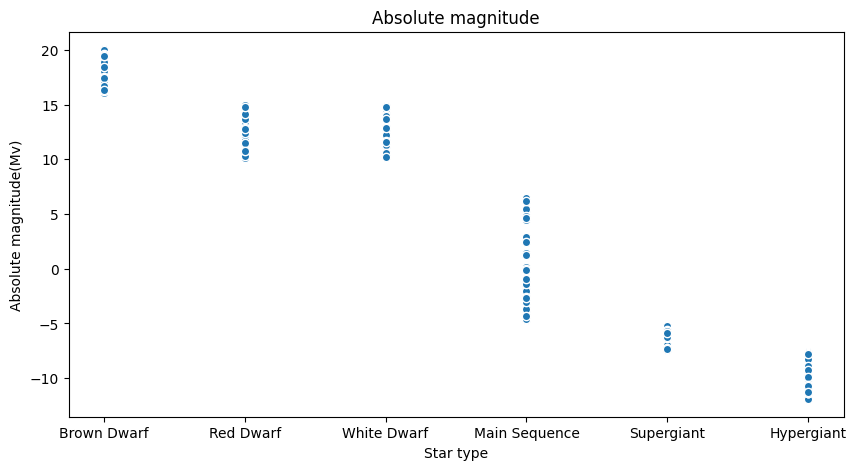

In [ ]:
plt.figure(figsize=(10,5)) # Spacing.
plt.title("Absolute magnitude") # Title.
sns.scatterplot(x=df['Star type'], y=df["Absolute magnitude(Mv)"], linewidth=1)

This graph shows that each type of star has its own range of absolute magnitudes, except for red and white dwarfs, which share the same magnitude range.

<Axes: >

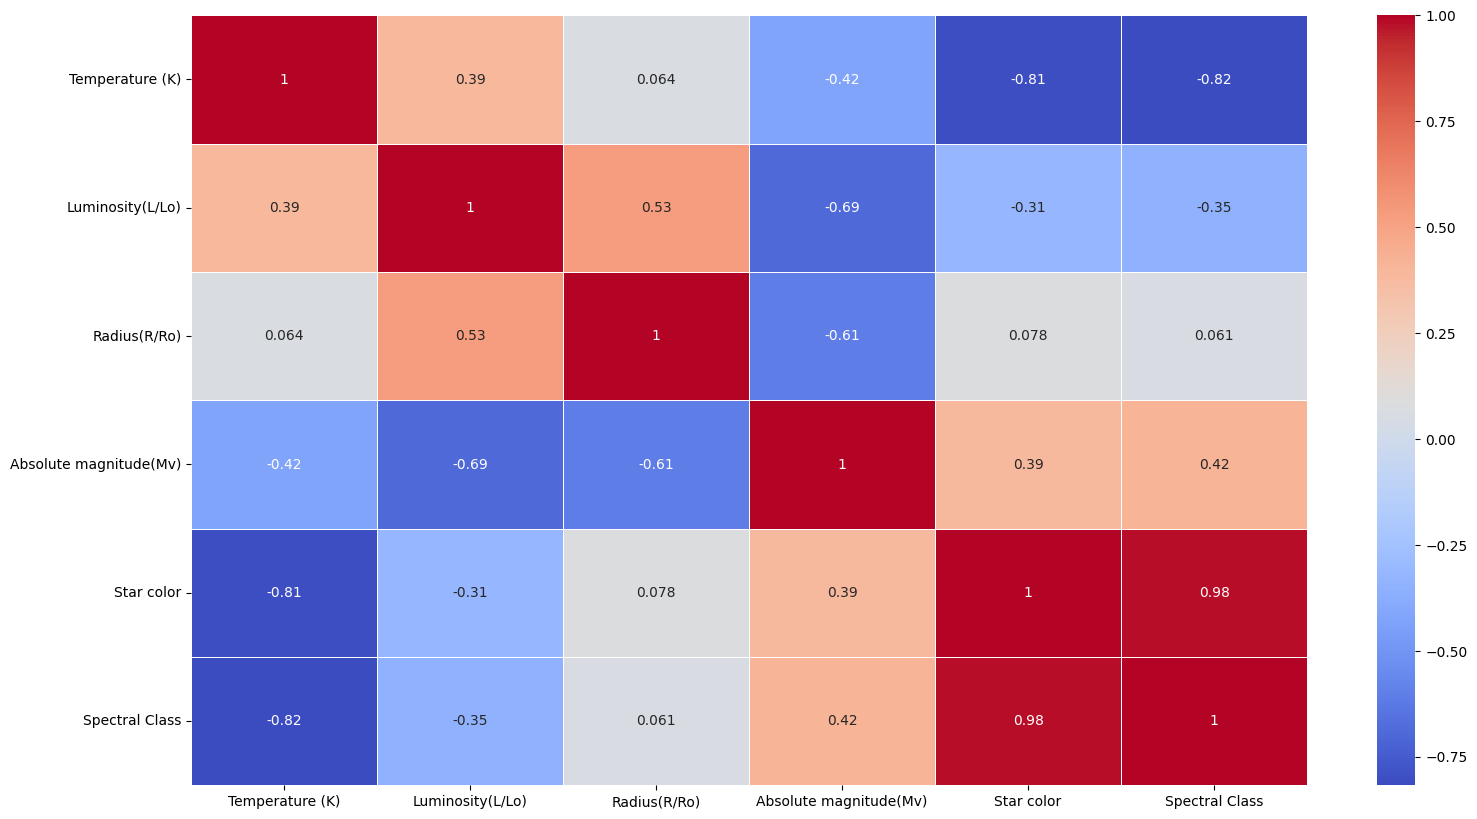

In [ ]:
corr_matrix = df.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

<Axes: title={'center': 'Temperature (K)'}, xlabel='Temperature (K)', ylabel='Density'>

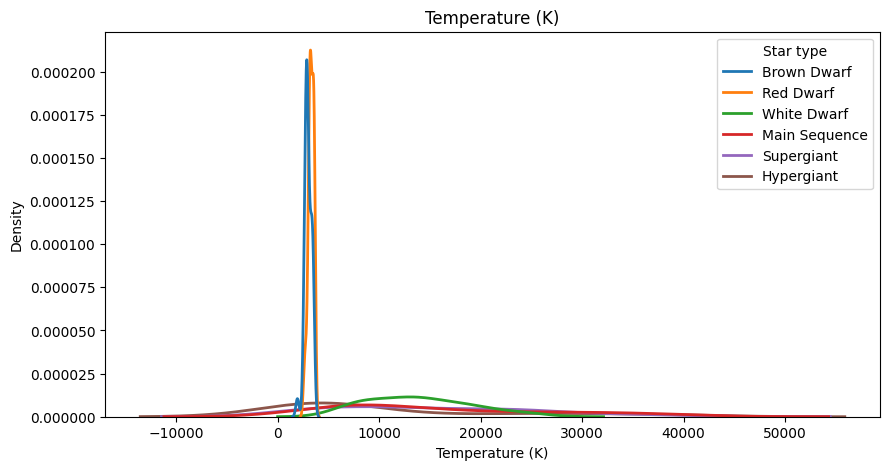

In [ ]:
plt.figure(figsize=(10,5)) # Spacing.
plt.title("Temperature (K)") # Title.
sns.kdeplot(x=df['Temperature (K)'], hue=df["Star type"], linewidth=2)

The graph indicates that red dwarfs and brown dwarfs can be distinguished based on their color.

<Axes: title={'center': 'Radius'}, xlabel='Star type', ylabel='Radius(R/Ro)'>

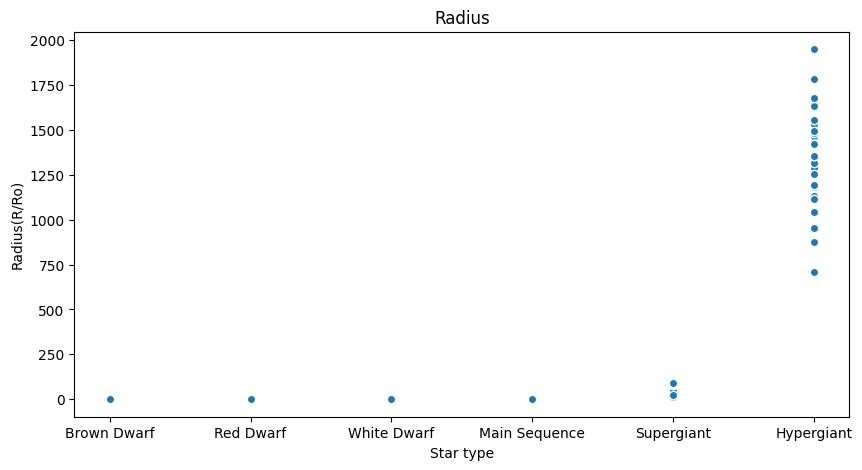

In [ ]:
plt.figure(figsize=(10,5)) # Spacing.
plt.title("Radius") # Title.
sns.scatterplot(x=df['Star type'], y=df['Radius(R/Ro)'], linewidth=1)

This graph shows that hypergiants are significantly larger than all other types of stars, while supergiants are also very large—surpassed only by hypergiants.

In [ ]:
df['Star type']=df['Star type'].replace({'Brown Dwarf':0,'Red Dwarf':1,'White Dwarf':2,'Main Sequence':3,'Supergiant':4,'Hypergiant':5})
# Converting the data back to numbers.

<ipython-input-38-d3a27231f1c7>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Star type']=df['Star type'].replace({'Brown Dwarf':0,'Red Dwarf':1,'White Dwarf':2,'Main Sequence':3,'Supergiant':4,'Hypergiant':5})


# Preparation

In [ ]:
print('Star type\n{}'.format(df['Star type'].value_counts())) # Making sure that we have the same amount of every star so there is no need to balance anything.

Star type
Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64


In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True) # Shuffling the data frame.
df # Printing it to see if its shuffled.

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,16500,0.01300,0.014,11.890,2,1,1
1,2637,0.00073,0.127,17.220,0,6,6
2,4980,0.35700,1.130,4.780,3,3,5
3,33421,352000.00000,67.000,-5.790,4,0,0
4,11096,112000.00000,12.000,-5.910,4,0,0
...,...,...,...,...,...,...,...
235,24630,363000.00000,63.000,-5.830,4,0,0
236,2650,0.00060,0.140,11.782,1,6,6
237,4077,0.08500,0.795,6.228,3,3,5
238,24490,248490.00000,1134.500,-8.240,5,1,1


# Training begins

In [ ]:
x = df.drop(['Star type'],axis=1) # Making an array of inputs.
y = df['Star type'].to_numpy() # Making an array of results.
print("start: ", x.shape, y.shape) # Making sure both have same length.

start:  (240, 6) (240,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20) # Extracting test data out of original dataset.
print("train: ", x_train.shape, y_train.shape) # Making sure shapes are good.
print("test: ", x_test.shape, y_test.shape) # Making sure shapes are good.

train:  (192, 6) (192,)
test:  (48, 6) (48,)


In [ ]:
scaler = MinMaxScaler()
print('before scaling:')
print('Max: ', x_train.max()) # Checking max before.
print('Min: ', x_train.min()) # Checkign min before.


x_train = scaler.fit_transform(x_train) # Scaling x training values between 0 and 1.
x_test = scaler.fit_transform(x_test) # Scaling x testing values between 0 and 1.

print('\nEverything has been scaled between 1 and 0')
print('Max: ', x_train.max()) # Checking max after.
print('Min: ', x_train.min()) # Checking min after.

before scaling:
Max:  Temperature (K)            40000.00
Luminosity(L/Lo)          834042.00
Radius(R/Ro)                1779.00
Absolute magnitude(Mv)        20.06
Star color                     6.00
Spectral Class                 6.00
dtype: float64
Min:  Temperature (K)           1939.00000
Luminosity(L/Lo)             0.00008
Radius(R/Ro)                 0.00840
Absolute magnitude(Mv)     -11.92000
Star color                   0.00000
Spectral Class               0.00000
dtype: float64

Everything has been scaled between 1 and 0
Max:  1.0000000000000002
Min:  0.0



# Training and evaluation

In [ ]:
# Looking for the best k.



best_knn = KNeighborsClassifier(n_neighbors = 1)
best_knn.fit(x_train, y_train)
best_knn_score = best_knn.score(x_test,y_test)

for k in range(2,30):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(x_train, y_train)
  knn_score = knn.score(x_test,y_test)
  print("k = {} score test = {}".format(k, knn_score))
  if knn_score > best_knn_score:
    best_knn = knn
    best_knn_score = knn_score

k = 2 score test = 0.9791666666666666
k = 3 score test = 0.9791666666666666
k = 4 score test = 0.9791666666666666
k = 5 score test = 0.9791666666666666
k = 6 score test = 0.9791666666666666
k = 7 score test = 0.9791666666666666
k = 8 score test = 0.9791666666666666
k = 9 score test = 0.9583333333333334
k = 10 score test = 0.9375
k = 11 score test = 0.9375
k = 12 score test = 0.8958333333333334
k = 13 score test = 0.9166666666666666
k = 14 score test = 0.9166666666666666
k = 15 score test = 0.875
k = 16 score test = 0.8333333333333334
k = 17 score test = 0.8125
k = 18 score test = 0.8125
k = 19 score test = 0.8125
k = 20 score test = 0.8125
k = 21 score test = 0.8125
k = 22 score test = 0.7916666666666666
k = 23 score test = 0.7916666666666666
k = 24 score test = 0.7708333333333334
k = 25 score test = 0.7708333333333334
k = 26 score test = 0.7708333333333334
k = 27 score test = 0.7708333333333334
k = 28 score test = 0.7708333333333334
k = 29 score test = 0.7708333333333334


In [ ]:
# Making the confusion matrix.
pred1 = best_knn.predict(x_test)
cm = confusion_matrix(pred1,y_test)
cm

array([[ 7,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  3,  1,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  9]])

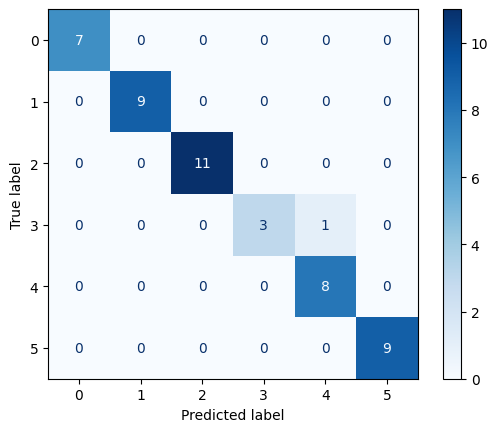

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format="d", cmap="Blues") # Plotting the confusion matrix as a heatmap chart.

We will display the Classification Report to evaluate the model's performance by examining metrics such as precision, recall, F1-score, and support. This will help us understand the model's accuracy and overall effectiveness.

In [ ]:
print(classification_report(pred1, y_test, digits=4)) # Checking the way the network perform.

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         7
           1     1.0000    1.0000    1.0000         9
           2     1.0000    1.0000    1.0000        11
           3     1.0000    0.7500    0.8571         4
           4     0.8889    1.0000    0.9412         8
           5     1.0000    1.0000    1.0000         9

    accuracy                         0.9792        48
   macro avg     0.9815    0.9583    0.9664        48
weighted avg     0.9815    0.9792    0.9783        48



precision - true_positive/(true_positive+false_positive).

recall - true_positive/(true_positive+false_negative).

f1 score - the measure the test's accuracy. (2\*precision*recall/(precision+recall))


| Star ID | 0 | 1 | 2 | 3 | 4 | 5 |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| Star Type | Brown Dwarf | Red Dwarf | White Dwarf | Main Sequence | Supergiant | Hypergiant |

# ANN

In [ ]:
x_new = df.iloc[:,0:4].to_numpy()
y_new = df.loc[:,['Star type']].to_numpy().reshape(1,-1).flatten()

In [ ]:
y_new = to_categorical(y)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.20, random_state=41)

scaler = MinMaxScaler()
print('Max: ',x_train.max())
print('Min: ', x_train.min())

# fit and transfrom.
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# everything has been scaled between 1 and 0.
print('Max: ',x_train.max())
print('Min: ', x_train.min())
print(x_test.shape, x_train.shape, y_test.shape, y_train.shape)

model = Sequential([
      Dense(128, activation='relu', input_shape=(4,)),
      Dense(64, activation='tanh'),
      Dense(32, activation='relu'),
      Dense(6, activation='softmax')
   ])

model.compile(
      optimizer='Adam',
      loss= 'categorical_crossentropy',
      metrics=['accuracy']
   )

[2 0 3 4 4 5 5 2 0 2 4 2 5 4 5 5 0 1 3 0 0 1 5 3 5 3 1 2 5 3 3 4 2 0 1 0 1
 5 1 5 4 5 4 1 3 0 4 3 1 0 2 0 2 1 4 2 5 3 1 1 3 0 0 0 4 0 4 2 5 1 5 5 2 0
 1 2 0 5 4 3 3 0 3 2 2 3 1 3 2 4 4 2 4 5 1 1 1 4 4 2 1 2 2 5 3 5 1 0 0 1 4
 4 5 2 5 3 2 4 3 3 3 2 0 2 5 3 1 3 1 5 2 2 0 0 3 1 5 0 1 0 3 0 1 0 0 4 3 4
 0 2 5 1 2 3 2 4 3 0 4 2 4 0 4 5 1 3 0 4 4 4 2 3 0 5 5 3 2 3 3 2 0 1 5 2 1
 1 4 1 4 1 1 4 0 5 4 5 1 5 1 0 5 3 4 5 4 2 2 5 2 4 5 0 1 0 3 3 4 0 5 2 1 3
 4 3 5 2 2 1 3 3 0 5 2 0 1 4 1 3 5 4]
Max:  849420.0
Min:  -11.92
Max:  1.0000000000000002
Min:  0.0
(48, 4) (192, 4) (48, 6) (192, 6)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
      x=x_train,
      y=y_train,
      epochs=75,
      shuffle=True
   )

Epoch 1/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2240 - loss: 1.7621
Epoch 2/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3193 - loss: 1.6871 
Epoch 3/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3327 - loss: 1.6011
Epoch 4/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3189 - loss: 1.5079
Epoch 5/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3471 - loss: 1.3985
Epoch 6/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3510 - loss: 1.3422
Epoch 7/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4458 - loss: 1.2275
Epoch 8/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4929 - loss: 1.1685
Epoch 9/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5613 - loss: 1.0637 
Epoch 10/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6291 - loss: 0.9853 
Epoch 11/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6763 - loss: 0.9118
Epoch 12/75
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7288 - loss: 0.8353
E

We evaluate the results of the training and testing, and then print the outcomes.

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
score_train = model.evaluate(x_train, y_train, verbose = 0)
model.predict(x_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print(history.history.keys())
acc=history.history['accuracy']
print("accuracy - train",score_train[1])

loss=history.history['loss']

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Test loss: 0.055282603949308395
Test accuracy: 1.0
dict_keys(['accuracy', 'loss'])
accuracy - train 1.0


We are generating a graph that shows the model's accuracy increasing as the number of epochs grows during training.

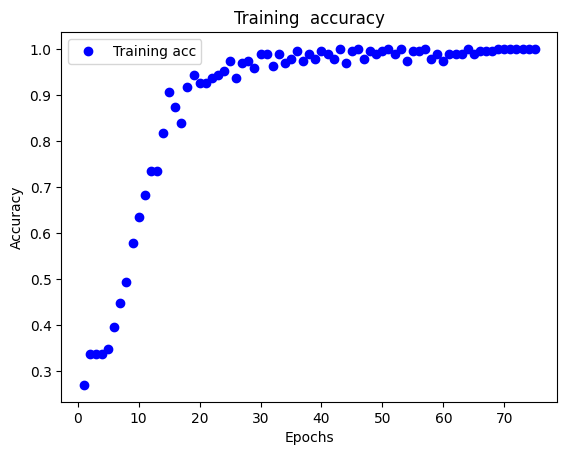

In [ ]:
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.title('Training  accuracy')
plt.legend()

plt.show()

We are generating a graph that shows the model's loss decreasing as the number of epochs increases during training.

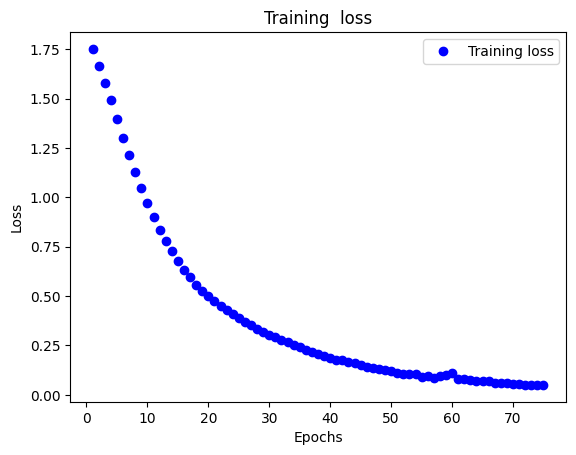

In [ ]:
epochs=range(1,len(loss)+1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(epochs, loss, 'bo', label='Training loss')

plt.title('Training  loss')
plt.legend()


plt.show()

We save the trained model to a file and then load it back when needed

In [ ]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_labels, y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


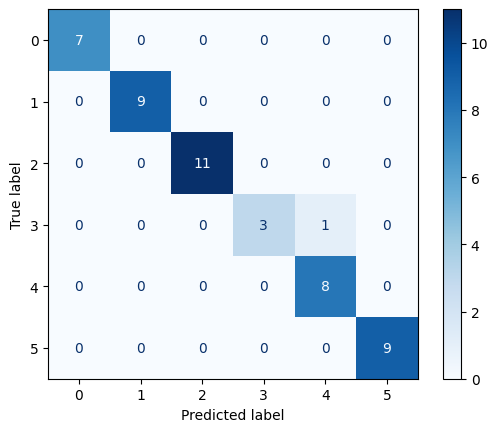

In [ ]:
isp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format="d", cmap="Blues")

We will display the Classification Report to evaluate the model's performance. This will help us understand the model's accuracy and overall effectiveness.

In [ ]:
print(classification_report(y_test_labels, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         7

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [ ]:
# save and load model
model.save('saved model.keras')
model1 = keras.models.load_model('saved model.keras')


SVM

We're now going to implement a Support Vector Machine (SVM) model on our dataset, with the objective of identifying the most effective kernel type for maximizing classification accuracy.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20) # Extracting test data out of original dataset.
x_train = scaler.fit_transform(x_train) # Scaling x training values between 0 and 1.
x_test = scaler.fit_transform(x_test) # Scaling x testing values between 0 and 1.

In [ ]:
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

best_kernel = "linear"
best_score = 0

for kernel in kernel_types:
    svm = SVC(kernel=kernel)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_score:
        best_score = accuracy
        best_kernel = kernel

print("kernal = {} score test = {}".format(best_kernel, best_score))

kernal = linear score test = 0.9791666666666666


In [ ]:
svm = SVC(kernel=best_kernel)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_pred,y_test)

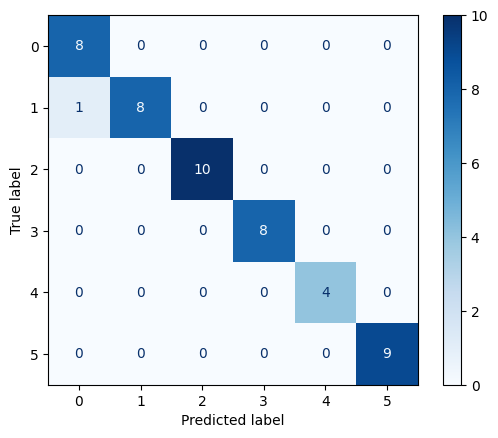

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(values_format="d", cmap="Blues")

We will display the Classification Report to evaluate the model's performance by examining metrics such as precision, recall, F1-score, and support. This will help us understand the model's accuracy and overall effectiveness.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.89      1.00      0.94         8
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



conclosion:
In my project, I achieved 100% accuracy using the KNN model, 100% accuracy using the ANN model and 91% accuracy using the SVM model. The models that works best for my project are KNN and ANN




